In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
import warnings

warnings.filterwarnings('ignore')


In [27]:
from google.colab import files
uploaded=files.upload()

Saving MDS.csv to MDS (1).csv


In [28]:
df = pd.read_csv('MDS.csv')
df.head()

,No.,Amine moiety,Tail moiety,Compound,Luciferase activity (RLU) *,SMILES,Molecular Formula,Total Molweight,AMW,ExactMW,cLogP,SlogP,XLogP,Mannhold LogP,cLogS,H-Acceptors,H-Donors,NumHBD,NumHBA,NumLipinskiHBA,NumLipinskiHBD,Total Surface Area,Polar Surface Area,TPSA,Rotatable Bonds,NumRotatableBonds,Lipinski Rule of Five,Formal Charge,Formal Charge (pos),Formal Charge (neg),Lipid type,Number of lipid,Number of water,RMSD(nm),Rg(nm),SASA (nm2),End-to-end distance(nm)
0,1,2A2,SC6,2A2-SC6,2,O=C(OCCOC(C(C)CSCCCCCC)=O)CCN(CCC(OCCOC(C(C)CS...,C38H71N3O8S2,762.127,762.133,761.468258,6.3230,5.7781,6.865,4.21,-4.055,11,0,0,13,11,0,634.70,165.52,114.92,36,32,4,0,0,0,2A2-SC6,1,3863,0.534,0.565,10.82,1.004
1,2,2A2,2T,2A2-2T,1,O=C(OCCOC(C(C)CSC/C=C/CCC)=O)CCN(CCC(OCCOC(C(C...,C38H67N3O8S2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,0,0,0,2A2-2T,1,3860,0.508,0.581,10.98,0.995
2,3,2A2,2C,2A2-2C,2,O=C(OCCOC(C(C)CSC/C=C\CCC)=O)CCN(CCC(OCCOC(C(C...,C38H67N3O8S2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,0,0,0,2A2-2C,1,3863,0.517,0.569,10.74,1.061
3,4,2A2,3T,2A2-3T,2,O=C(OCCOC(C(C)CSCC/C=C/CC)=O)CCN(CCC(OCCOC(C(C...,C38H67N3O8S2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,0,0,0,2A2-3T,1,3863,0.548,0.563,10.70,0.935
4,5,2A2,3C,2A2-3C,3,O=C(OCCOC(C(C)CSCC/C=C\CC)=O)CCN(CCC(OCCOC(C(C...,C38H67N3O8S2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,0,0,0,2A2-3C,1,3860,0.502,0.576,10.88,1.025


In [29]:
#reading the file
df = pd.read_csv('MDS.csv')
#dropping the unneccessory coulmn
drop_columns = ['No.', 'Amine moiety', 'Tail moiety', 'Compound','SMILES','Molecular Formula','Lipid type','Number of lipid','Formal Charge','Formal Charge (pos)','Formal Charge (neg)']
#drop_columns = ['No.', 'Amine moiety', 'Tail moiety', 'Compound','SMILES','Molecular Formula','Lipid type','Number of lipid'
               # ,'NumHBD','Formal Charge','Formal Charge (pos)','Formal Charge (neg)' ,'Number of lipid','AMW','ExactMW','SlogP','XLogP',
               # 'NumHBA','NumLipinskiHBA','NumRotatableBonds','NumLipinskiHBD','Polar Surface Area','Lipinski Rule of Five'	]
df.drop(drop_columns, axis=1,inplace =True)
X= df.drop(['Luciferase activity (RLU) *'],axis = 1)#.to_numpy()
y= df['Luciferase activity (RLU) *']#.to_numpy()

In [30]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [31]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1,
            'n_estimators':100
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [33]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)


In [34]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)


In [35]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


XGBoost model accuracy score: 0.5263


In [36]:
#k-fold cross validation
from xgboost import cv

params = {'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50, early_stopping_rounds=10, as_pandas=True, seed=123)

In [37]:
xgb_cv.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2.198616,0.098938,2.168943,0.444173
1,2.041194,0.088099,2.013260,0.443240
2,1.901158,0.079941,1.885185,0.437341
3,1.777217,0.072310,1.761259,0.438481
4,1.667300,0.064119,1.663571,0.431274


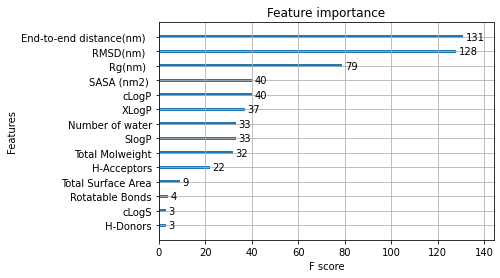

In [38]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()